In [2]:
import sympy as sym
from IPython.display import display
from IPython.core.display import Math
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x
from matplotlib.patches import Polygon
import sympy.plotting.plot as symplot
import scipy as sp
from scipy.signal import find_peaks

sym.init_printing()

In [ ]:
x = sym.symbols('x')

fx = sym.exp(-x)*sym.sqrt(x+1)
gx = sym.cos(x + sym.sin(x))

fxx = sym.lambdify(x, fx)
gxx = sym.lambdify(x, gx)
xx = np.linspace(0, 10, 100)

limF = sym.limit(fx,x,3)
limG = sym.limit(gx,x,3)
limFG = sym.limit(fx/gx,x,3)

print(limF/limG - limFG) 



plt.plot(xx, fxx(xx))
plt.plot(xx, gxx(xx))
plt.show()

In [ ]:
x = sym.symbols('x')

piece1 = x**3
piece2 = sym.log(x,2)
fx = sym.Piecewise((piece1, x <= 0), (piece2, x > 0))

fxx = sym.lambdify(x, fx)
xx = np.linspace(-2, 2, 100)
display(Math('fx = ' + sym.latex(fx)))
with plt.xkcd():
    plt.plot(xx, fxx(xx))
plt.show()

In [ ]:
x = sym.symbols('x')

fx = 3 + 2*x - 5*x**2 + 7*x**4
gx = 4*x**2 + x**5

dfx = sym.diff(fx)
gfx = sym.diff(gx)
sumgdfx = sym.diff(gx+fx)
mulgdfx = sym.diff(gx*fx)

expr1 = sumgdfx - dfx - gfx
expr2 = mulgdfx / (dfx * gfx)
expr3 = mulgdfx / ((dfx * gx) + (fx * gfx))
display(Math(sym.latex(sym.expand(expr1))))
display(Math(sym.latex(sym.expand(expr2))))
display(Math(sym.latex(sym.expand(expr3))))


display(Math(sym.latex(gx)))

In [ ]:
x, a = sym.symbols('x,a')

fx = sym.cos(x + sym.sin(x)) + a

for ai in range(4):
    
    if ai == 0:
        p = symplot(fx.subs(a, ai), show=False, label='a=' + str(ai))

    else:
        p.extend(symplot(fx.subs(a, ai), show=False, label='a=' + str(ai)))
f
or ai in range(4):
    
    if ai == 0:
        p1 = symplot(sym.diff(fx.subs(a, ai)), show=False, label='a=' + str(ai))

    else:
        p1.extend(symplot(sym.diff(fx.subs(a, ai)),
                  show=False, label='a=' + str(ai)))
    # fx = np.diff(fx)
p.show()
p1.show()

In [4]:
def main(f, xa, bnds):

    df = sym.diff(f)
    fa = f.subs(x, xa)
    dfa = df.subs(x, xa)

    xx = np.linspace(bnds[0], bnds[1], 200)
    return dfa *(xx-xa) +fa

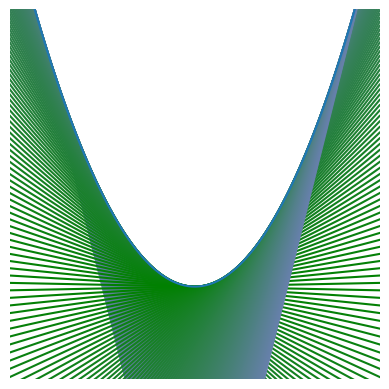

In [18]:
x = sym.symbols('x')
f = x**2
xx = np.linspace(-2, 2, 200)
ffun = sym.lambdify(x, f)(xx)
plt.axis('off')
plt.axis([-2, 2, -1, 3])
plt.axis('square')
for a in xx:
    y = main(f, a, xx[[0, -1]])
    plt.plot(xx, y,
             color=[abs(a)/5, abs(0.5), abs(a)/3])
plt.plot(xx, ffun)
plt.show()